## 한글 폰트 설치

In [1]:
### 한글 폰트 설치
!apt-get install -y fonts-nanum
!fc-cache -fv
!rm ~/.cache/matplotlib -rf
# 설치 후 colab의 경우 Runtime > Restart session 필요

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 32 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

## matplotlib 시각화

In [2]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
mpl.rc('font', family='NanumBarunGothic') # 혹은 다른 설치한 Nanum 폰트 사용

## load dataset

In [3]:
import pandas as pd
df_RCOCT = pd.read_csv("/content/RentalCarOfContractType.csv")
df_RCOCT[:2]

,id,type_of_contract,type_of_contract2,channel,datetime,Term,payment_type,product,amount,state,overdue_count,overdue,credit rating,bank,cancellation,age,Mileage
0,66758234,렌탈,Normal,서비스 방문,2019-10-20,60,CMS,K1,96900,계약확정,0,없음,9.0,새마을금고,정상,43.0,1862.0
1,66755948,렌탈,Extension_Rental,서비스 방문,2019-10-20,60,카드이체,K1,102900,계약확정,0,없음,2.0,현대카드,정상,62.0,2532.0


## 정규분포 확인 : 연속형
- anderson normality test : significance_level의 인덱스와 동일한 인덱스의 critical_values 값이 significance_level보다 크면 귀무가설로 정규분포이다.
- shapiro normality test : pvalue 값이 0.05보다 크면 귀무가설로 정규분포이다.

### 데이터 건수가 5천개 이상 : Anderson normality Test
- 대상 확인 age : 정규분포

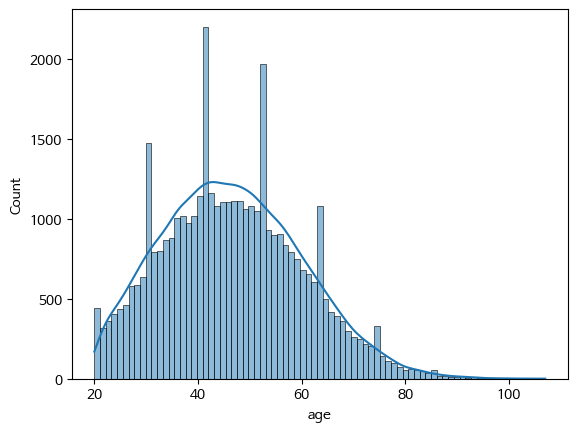

In [4]:
sns.histplot(data=df_RCOCT, x = 'age', kde=True) # 결측치 제거 전
plt.show()

<Axes: xlabel='age', ylabel='Count'>

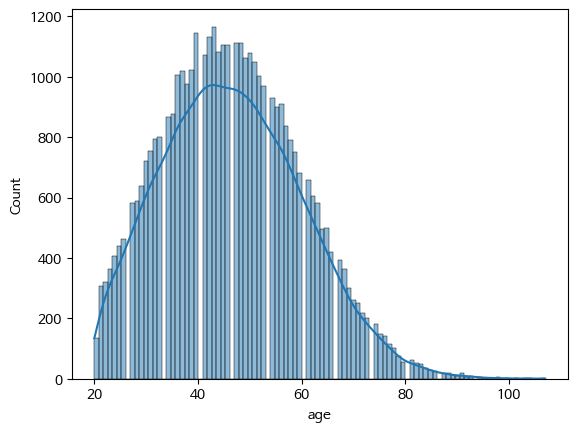

In [5]:
df_RCOCT_age = df_RCOCT['age'].dropna().copy()
sns.histplot(data=df_RCOCT_age, bins = 100,kde=True) # return datetyp0e Series class

In [6]:
df_RCOCT_age.count()

40509

In [7]:
import scipy.stats as stats

In [15]:
# stats.anderson을 사용한 정규 분포 검정
result = stats.anderson(df_RCOCT['Mileage'].dropna())
print('Test Statistic: %.3f' % result.statistic)
for i in range(len(result.critical_values)):
    sl, cv = result.significance_level[i], result.critical_values[i]
    if result.statistic < cv:
        print('%.1f%% 수준에서 데이터는 정규 분포를 따름 (검정 통계량 %.3f < 임계값 %.3f)' % (sl, result.statistic, cv))
    else:
        print('%.1f%% 수준에서 데이터는 정규 분포를 따르지 않음 (검정 통계량 %.3f >= 임계값 %.3f)' % (sl, result.statistic, cv))

Test Statistic: 58.826
15.0% 수준에서 데이터는 정규 분포를 따르지 않음 (검정 통계량 58.826 >= 임계값 0.576)
10.0% 수준에서 데이터는 정규 분포를 따르지 않음 (검정 통계량 58.826 >= 임계값 0.656)
5.0% 수준에서 데이터는 정규 분포를 따르지 않음 (검정 통계량 58.826 >= 임계값 0.787)
2.5% 수준에서 데이터는 정규 분포를 따르지 않음 (검정 통계량 58.826 >= 임계값 0.918)
1.0% 수준에서 데이터는 정규 분포를 따르지 않음 (검정 통계량 58.826 >= 임계값 1.092)


In [9]:
statistic,critical_values,significance_level = stats.anderson(df_RCOCT_age)
print(statistic)              # 검정 통계량, 비교 기준 없어 현재 사용 불가
print(critical_values)        # 0.05의 값이 0.05보다 크면 귀무가설이기 때문에 정규분포/0.05보다 작을 경우 대립가설이기 때문에 비정규분포
print(significance_level)     # 유의 수준 단계 [15.  10.   5.   2.5  1. ] ->[15%  10%   5%   2.5%  1% ]

81.5597210113192
[0.576 0.656 0.787 0.918 1.092]
[15.  10.   5.   2.5  1. ]


In [10]:
stats.anderson(df_RCOCT['Mileage'].dropna())    # 정규분포

AndersonResult(statistic=58.82611209370225, critical_values=array([0.576, 0.656, 0.787, 0.918, 1.092]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]), fit_result=  params: FitParams(loc=1967.9224123034387, scale=436.707328748971)
 success: True
 message: '`anderson` successfully fit the distribution to the data.')

### 데이터 건수가 5천건 이하 : shapiro normality test
- Mileage[:400] -> pvalue가 0.05보다 작기 때문에 정규분포가 아님/대립가설

In [11]:
df_RCOCT_Mileage = df_RCOCT.dropna()[:400]

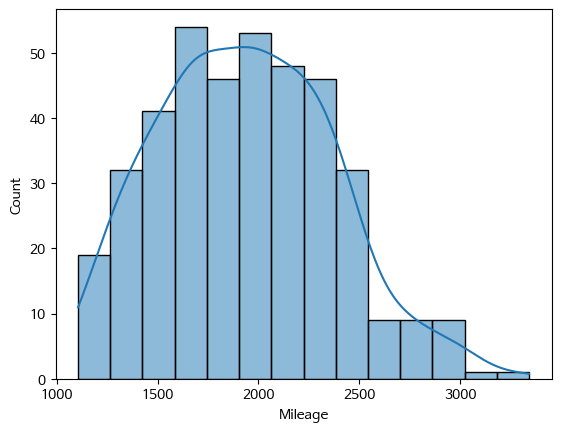

In [12]:
sns.histplot(data=df_RCOCT_Mileage, x = 'Mileage', kde = True)
plt.show()

In [13]:
stats.shapiro(df_RCOCT_Mileage['Mileage']) # pvalue가 0.05보다 작기 때문에 정규분포가 아님

ShapiroResult(statistic=0.9863461852073669, pvalue=0.0008144713356159627)

In [14]:
stats.anderson(df_RCOCT['Mileage'].dropna())

AndersonResult(statistic=58.82611209370225, critical_values=array([0.576, 0.656, 0.787, 0.918, 1.092]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]), fit_result=  params: FitParams(loc=1967.9224123034387, scale=436.707328748971)
 success: True
 message: '`anderson` successfully fit the distribution to the data.')